# AIR QUALITY PREDICTION

In [1]:
import pandas as pd  # for data manipulation
import numpy as np    # for mathematical calculation
import seaborn as sns   # for data visualisation
import matplotlib.pyplot as plt   #for plotting graph
%matplotlib inline 
#matplotlib inline ensures command in cells bellow the cell that outputs a plot does not affect the plot
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas_profiling
import warnings   # to ignore warnings

#import all libraries and modules at the beginning of the code

# LOADING IN THE DATASETS

In [2]:
#reading the datasets
train = pd.read_csv('train_set.csv', parse_dates=["created_at.1"])
test= pd.read_csv('test_set.csv', parse_dates=["created_at.1"])

In [3]:
train.head() #Previewing the train dataset

,ID,created_at.1,hours,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5
0,ID_S5F7N8C8,2019-11-18,1,USEmbassy,29.825000,34.153636,0.0,0.0,0.863167,22.558333,0.299255,32.592686,1199,4374,21,14,6834,130,34.0
1,ID_KZTNLBW4,2019-11-18,6,USEmbassy,36.431364,45.215455,0.0,0.0,0.746000,23.400000,0.299255,32.592686,1199,4374,21,14,6834,130,50.0
2,ID_KVG8ZHW1,2019-11-18,4,USEmbassy,14.281556,15.751333,0.0,0.0,0.694333,25.375000,0.299255,32.592686,1199,4374,21,14,6834,130,22.0
3,ID_UAJL1ES4,2019-11-18,7,USEmbassy,46.380889,59.780222,0.0,0.0,0.821667,21.958333,0.299255,32.592686,1199,4374,21,14,6834,130,64.0
4,ID_FZA388D3,2019-11-18,12,USEmbassy,31.392955,37.053864,0.0,0.0,0.912000,21.133333,0.299255,32.592686,1199,4374,21,14,6834,130,38.0


In [4]:
test.head() #Previewing the train dataset

,ID,created_at.1,hour,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road
0,ID_ETVI0YS4,2019-11-18,9,USEmbassy,52.809286,65.370238,0.0,0.0,0.886833,20.983333,0.299255,32.592686,1199,4374,21,14,6834,130
1,ID_N3DAFCYB,2019-11-18,10,USEmbassy,70.489091,79.129545,0.0,0.0,0.998750,18.125000,0.299255,32.592686,1199,4374,21,14,6834,130
2,ID_QQPQZ946,2019-11-18,8,USEmbassy,48.640889,62.530000,0.0,0.0,0.866250,21.300000,0.299255,32.592686,1199,4374,21,14,6834,130
3,ID_F5Q2FD14,2019-11-18,10,USEmbassy,58.873902,70.057317,0.0,0.0,0.892750,20.675000,0.299255,32.592686,1199,4374,21,14,6834,130
4,ID_L6NZJIWL,2019-11-19,7,USEmbassy,90.093261,99.454783,0.0,0.0,0.840500,22.241667,0.299255,32.592686,1199,4374,21,14,6834,130


In [5]:
#Lets say i want to rename my test column(hour to hours)
test.rename(columns= {'hour':'hours'},inplace = True)
test

,ID,created_at.1,hours,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road
0,ID_ETVI0YS4,2019-11-18,9,USEmbassy,52.809286,65.370238,0.000000,0.000000,0.886833,20.983333,0.299255,32.592686,1199,4374,21,14,6834,130
1,ID_N3DAFCYB,2019-11-18,10,USEmbassy,70.489091,79.129545,0.000000,0.000000,0.998750,18.125000,0.299255,32.592686,1199,4374,21,14,6834,130
2,ID_QQPQZ946,2019-11-18,8,USEmbassy,48.640889,62.530000,0.000000,0.000000,0.866250,21.300000,0.299255,32.592686,1199,4374,21,14,6834,130
3,ID_F5Q2FD14,2019-11-18,10,USEmbassy,58.873902,70.057317,0.000000,0.000000,0.892750,20.675000,0.299255,32.592686,1199,4374,21,14,6834,130
4,ID_L6NZJIWL,2019-11-19,7,USEmbassy,90.093261,99.454783,0.000000,0.000000,0.840500,22.241667,0.299255,32.592686,1199,4374,21,14,6834,130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,ID_9YJUCTJF,2021-01-31,12,Nakawa,22.055000,24.770000,23.052727,26.852727,0.589667,26.233333,0.331740,32.609510,1191,5865,31,-11,4780,500
2729,ID_6WRAL1Q8,2021-01-31,6,Nakawa,19.817143,22.565476,20.308333,23.930952,0.613083,26.191667,0.331740,32.609510,1191,5865,31,-11,4780,500
2730,ID_1MORYDEC,2021-01-31,10,Nakawa,55.270270,69.095135,55.128108,70.771892,0.838167,21.450000,0.331740,32.609510,1191,5865,31,-11,4780,500
2731,ID_UZFR21JW,2021-01-31,12,Nakawa,55.810682,70.112500,55.766818,71.516818,0.833000,20.083333,0.331740,32.609510,1191,5865,31,-11,4780,500


In [6]:
train.isnull().sum()

ID                  0
created_at.1        0
hours               0
site                0
pm2_5               0
pm10                0
s2_pm2_5            0
s2_pm10             0
humidity            6
temp               17
lat                 0
long                0
altitude            0
greenness           0
landform_90m        0
landform_270m       0
population          0
dist_major_road     0
ref_pm2_5           0
dtype: int64

In [7]:
test.isnull().sum()

ID                 0
created_at.1       0
hours              0
site               0
pm2_5              0
pm10               0
s2_pm2_5           0
s2_pm10            0
humidity           1
temp               4
lat                0
long               0
altitude           0
greenness          0
landform_90m       0
landform_270m      0
population         0
dist_major_road    0
dtype: int64

# DESCRIPTIVE STATISTICS USING PANDAS PROFILING

In [8]:
#import pandas_profiling 
#train.profile_report()

In [9]:
train.describe()

,hours,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5
count,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10926.000000,10915.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000,10932.000000
mean,6.512989,51.543471,59.794230,48.183486,56.765928,0.824849,21.962882,0.314090,32.588472,1207.406696,5166.938986,22.570618,14.052415,6990.007135,286.165843,53.018432
std,3.456503,34.588032,38.214016,34.259708,38.876526,0.135233,2.803965,0.016704,0.013861,16.369252,904.989287,3.638757,12.404855,1201.835036,175.912188,35.570551
min,1.000000,0.567273,0.595909,0.000000,0.000000,0.307167,16.175000,0.299255,32.568561,1191.000000,4374.000000,21.000000,-11.000000,4780.000000,130.000000,0.100000
25%,4.000000,29.370546,33.740357,26.605675,30.255752,0.735000,19.775000,0.299255,32.568561,1199.000000,4374.000000,21.000000,14.000000,6834.000000,130.000000,30.000000
50%,7.000000,43.659269,54.310698,42.184865,52.554515,0.857208,21.350000,0.299255,32.592686,1199.000000,4374.000000,21.000000,14.000000,6834.000000,130.000000,43.900000
75%,10.000000,63.956750,74.936473,60.999375,73.278125,0.933729,24.025000,0.333501,32.592686,1233.000000,6340.000000,21.000000,28.000000,8518.000000,475.000000,66.000000
max,12.000000,335.433023,407.713954,330.275151,384.627046,1.000000,30.781818,0.333501,32.609510,1233.000000,6340.000000,31.000000,28.000000,8518.000000,500.000000,459.000000


In [10]:
test.describe()

,hours,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road
count,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2732.000000,2729.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000,2733.000000
mean,6.496524,52.115167,60.320047,48.884620,57.464163,0.823830,21.997552,0.314090,32.588468,1207.410538,5166.982437,22.569704,14.055982,6990.349067,286.163557
std,3.460889,36.221644,39.726532,36.061169,40.804437,0.132842,2.777461,0.016706,0.013863,16.372577,905.158426,3.638394,12.404960,1201.902897,175.933715
min,1.000000,0.954318,0.982500,0.000000,0.000000,0.320417,16.575000,0.299255,32.568561,1191.000000,4374.000000,21.000000,-11.000000,4780.000000,130.000000
25%,4.000000,27.844286,31.470571,25.351591,28.655714,0.738292,19.800000,0.299255,32.568561,1199.000000,4374.000000,21.000000,14.000000,6834.000000,130.000000
50%,6.000000,44.166279,54.977000,42.573256,53.061860,0.857583,21.433333,0.299255,32.592686,1199.000000,4374.000000,21.000000,14.000000,6834.000000,130.000000
75%,9.000000,63.894186,74.967317,61.420976,73.904884,0.929110,24.033333,0.333501,32.592686,1233.000000,6340.000000,21.000000,28.000000,8518.000000,475.000000
max,12.000000,297.689524,320.712619,291.778571,341.135476,1.000000,30.716667,0.333501,32.609510,1233.000000,6340.000000,31.000000,28.000000,8518.000000,500.000000


# DATA PREPROCESSING
Filling Missing Values

In [11]:
train[train['temp'].isnull()].index #checking for the index of missing values

Int64Index([ 379,  380,  381,  382,  383,  384,  385,  386,  387,  388,  389,
             391,  395,  396,  397, 2005, 2931],
           dtype='int64')

In [12]:
test[test['temp'].isnull()].index #checking for the index of missing values

Int64Index([87, 92, 93, 94], dtype='int64')

In [13]:
train[train['humidity'].isnull()].index #checking for the index of missing values

Int64Index([2005, 2753, 2931, 4894, 8686, 10701], dtype='int64')

In [14]:
train[train['humidity'].isnull()].index #checking for the index of missing values

Int64Index([2005, 2753, 2931, 4894, 8686, 10701], dtype='int64')

In [15]:
#Using interpolation method to fill the missing values
train['temp'].interpolate(method='linear', inplace= True)

In [16]:
train['humidity'].interpolate(method='linear', inplace= True)

In [17]:
#Using interpolation method to fill the missing values
test['humidity'].interpolate(method='linear', inplace= True)

In [18]:
test['temp'].interpolate(method='linear', inplace= True)

In [19]:
train.isnull().sum()

ID                 0
created_at.1       0
hours              0
site               0
pm2_5              0
pm10               0
s2_pm2_5           0
s2_pm10            0
humidity           0
temp               0
lat                0
long               0
altitude           0
greenness          0
landform_90m       0
landform_270m      0
population         0
dist_major_road    0
ref_pm2_5          0
dtype: int64

# DATA VISUALIZATION

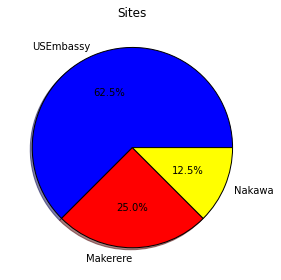

In [20]:
slices= [100,40,20] #adding percentage to my chart
labels = ['USEmbassy','Makerere','Nakawa']
colors =['blue','red','yellow']
explode =[0,0,0]
plt.pie(slices,labels=labels,colors=colors, explode=explode, shadow=True, autopct='%1.1f%%',wedgeprops={'edgecolor':'black'})
plt.title('Sites')
plt.tight_layout()

plt.show()

<AxesSubplot:title={'center':'train_dataset'}>

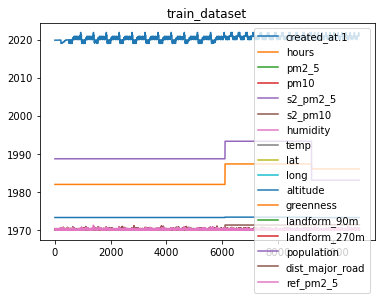

In [21]:
train.plot.line(title='train_dataset')

<AxesSubplot:xlabel='count', ylabel='greenness'>

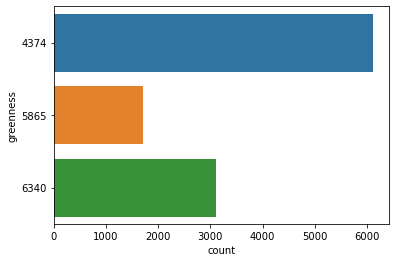

In [22]:
sns.countplot(y= 'greenness', data=train)

In [23]:
col = ['ID', 'created_at.1','hours','landform_90m','landform_270m','population','site','greenness','altitude','lat','long']
train_new = train.drop(col, axis=1)

C:\Users\OLADEJI\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\OLADEJI\anaconda3\lib\site-packages\pandas\core\arraylike.py:358: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


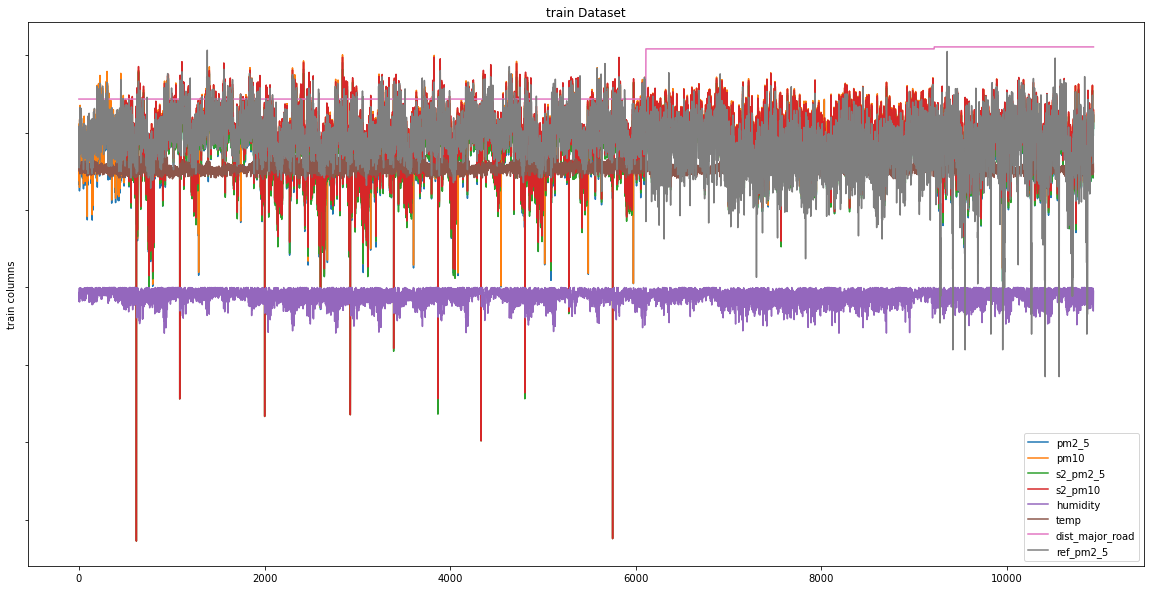

In [24]:
x_data = range(0, train_new.shape[0])
columns = list(train_new.columns)

fig, ax= plt. subplots(figsize=(20, 10))

#PLOT EACH COLUMN

for i in columns:
    ax.plot(x_data, np.log(train_new[i]), label= i)
#let's make the y axis have no ticks
ax.yaxis.set_ticklabels([])
#let's give y axis a label instead

ax.set_ylabel('train columns')

ax.set_title('train Dataset')
ax.legend()

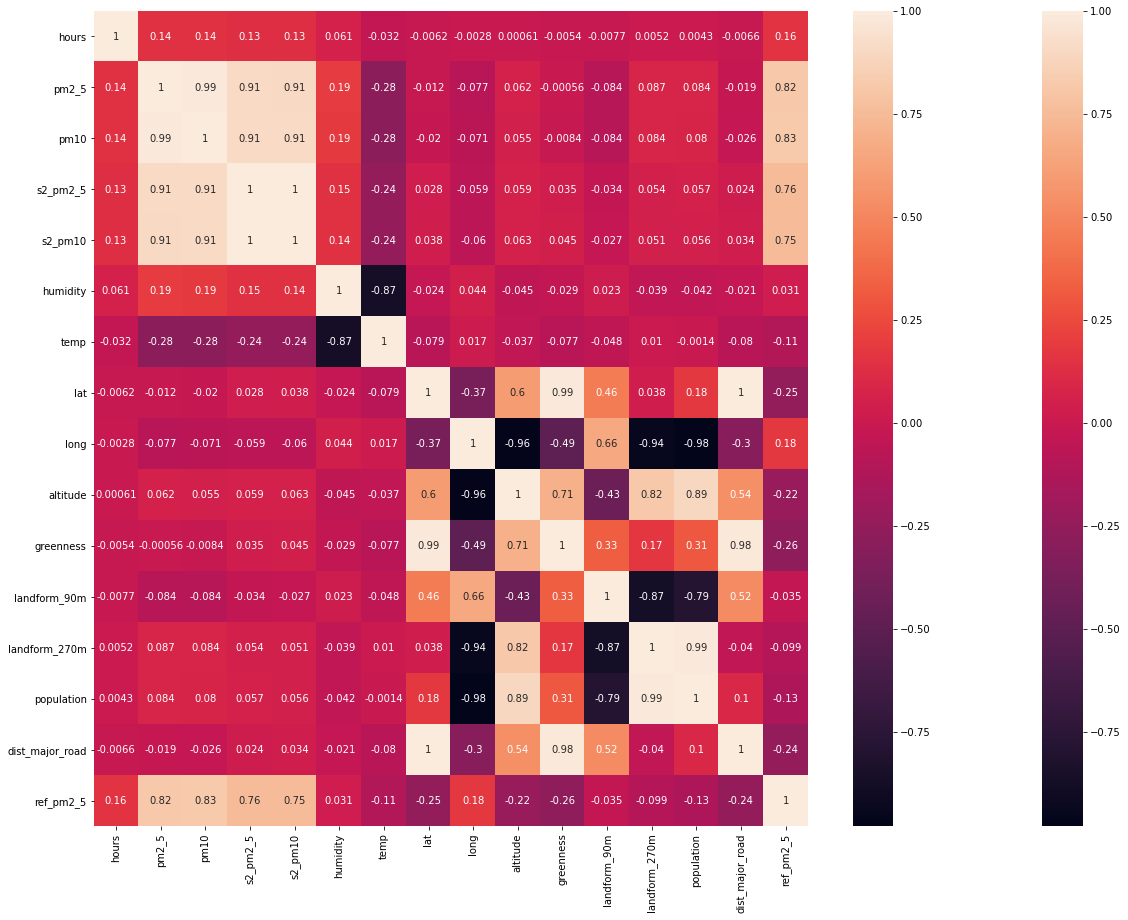

In [25]:
plt.figure(figsize=(20, 15))
        #This specifies the size, the bigger the map,the easier we can  understand the map
    
sns.heatmap(train.corr())
        #This is sufficient but adding the 'annot' argument makes interpretation easier
    
sns.heatmap(train.corr(), annot = True) # 'annot' helps display the correlation coefficient


plt.show()

In [26]:
train.drop('ID', axis=1, inplace=True)
test.drop('ID', axis=1, inplace=True)

In [27]:
print(len(train.columns))
print(len(test.columns))

18
17


# DEALING WITH DATETIME 

In [28]:
from datetime import datetime

In [29]:
def date_xtract(data):
    for date_column in ["created_at.1"]:
        data[date_column+"day"] = data[date_column].dt.day
        data[date_column+"month"] = data[date_column].dt.month
        data[date_column+"year"] = data[date_column].dt.year
        data.drop(date_column, axis=1, inplace=True)
    return data

In [30]:
date_xtract(train)

,hours,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,ref_pm2_5,created_at.1day,created_at.1month,created_at.1year
0,1,USEmbassy,29.825000,34.153636,0.000000,0.000000,0.863167,22.558333,0.299255,32.592686,1199,4374,21,14,6834,130,34.0,18,11,2019
1,6,USEmbassy,36.431364,45.215455,0.000000,0.000000,0.746000,23.400000,0.299255,32.592686,1199,4374,21,14,6834,130,50.0,18,11,2019
2,4,USEmbassy,14.281556,15.751333,0.000000,0.000000,0.694333,25.375000,0.299255,32.592686,1199,4374,21,14,6834,130,22.0,18,11,2019
3,7,USEmbassy,46.380889,59.780222,0.000000,0.000000,0.821667,21.958333,0.299255,32.592686,1199,4374,21,14,6834,130,64.0,18,11,2019
4,12,USEmbassy,31.392955,37.053864,0.000000,0.000000,0.912000,21.133333,0.299255,32.592686,1199,4374,21,14,6834,130,38.0,18,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10927,6,Nakawa,17.016829,20.228537,16.942927,21.127805,0.622500,25.941667,0.331740,32.609510,1191,5865,31,-11,4780,500,55.7,28,1,2021
10928,6,Nakawa,59.281818,71.926364,59.396818,73.563636,0.931083,19.600000,0.331740,32.609510,1191,5865,31,-11,4780,500,65.9,29,1,2021
10929,6,Nakawa,50.053438,63.464062,50.735312,65.436875,0.544417,25.266667,0.331740,32.609510,1191,5865,31,-11,4780,500,82.8,29,1,2021
10930,6,Nakawa,87.723488,98.219070,87.113488,99.662791,0.863750,19.891667,0.331740,32.609510,1191,5865,31,-11,4780,500,92.8,30,1,2021


In [31]:
date_xtract(test)

,hours,site,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,greenness,landform_90m,landform_270m,population,dist_major_road,created_at.1day,created_at.1month,created_at.1year
0,9,USEmbassy,52.809286,65.370238,0.000000,0.000000,0.886833,20.983333,0.299255,32.592686,1199,4374,21,14,6834,130,18,11,2019
1,10,USEmbassy,70.489091,79.129545,0.000000,0.000000,0.998750,18.125000,0.299255,32.592686,1199,4374,21,14,6834,130,18,11,2019
2,8,USEmbassy,48.640889,62.530000,0.000000,0.000000,0.866250,21.300000,0.299255,32.592686,1199,4374,21,14,6834,130,18,11,2019
3,10,USEmbassy,58.873902,70.057317,0.000000,0.000000,0.892750,20.675000,0.299255,32.592686,1199,4374,21,14,6834,130,18,11,2019
4,7,USEmbassy,90.093261,99.454783,0.000000,0.000000,0.840500,22.241667,0.299255,32.592686,1199,4374,21,14,6834,130,19,11,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2728,12,Nakawa,22.055000,24.770000,23.052727,26.852727,0.589667,26.233333,0.331740,32.609510,1191,5865,31,-11,4780,500,31,1,2021
2729,6,Nakawa,19.817143,22.565476,20.308333,23.930952,0.613083,26.191667,0.331740,32.609510,1191,5865,31,-11,4780,500,31,1,2021
2730,10,Nakawa,55.270270,69.095135,55.128108,70.771892,0.838167,21.450000,0.331740,32.609510,1191,5865,31,-11,4780,500,31,1,2021
2731,12,Nakawa,55.810682,70.112500,55.766818,71.516818,0.833000,20.083333,0.331740,32.609510,1191,5865,31,-11,4780,500,31,1,2021


In [32]:
#Split data into features and target
X = train.drop(['ref_pm2_5'], axis='columns')
y = train['ref_pm2_5']

# FEATURE ENGINEERING
#For converting categorical variables to Numerical variables

In [33]:
#using get dummies function from pandas
X = pd.get_dummies(X)

In [34]:
X.head()

,hours,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,...,landform_90m,landform_270m,population,dist_major_road,created_at.1day,created_at.1month,created_at.1year,site_Makerere,site_Nakawa,site_USEmbassy
0,1,29.825000,34.153636,0.0,0.0,0.863167,22.558333,0.299255,32.592686,1199,...,21,14,6834,130,18,11,2019,0,0,1
1,6,36.431364,45.215455,0.0,0.0,0.746000,23.400000,0.299255,32.592686,1199,...,21,14,6834,130,18,11,2019,0,0,1
2,4,14.281556,15.751333,0.0,0.0,0.694333,25.375000,0.299255,32.592686,1199,...,21,14,6834,130,18,11,2019,0,0,1
3,7,46.380889,59.780222,0.0,0.0,0.821667,21.958333,0.299255,32.592686,1199,...,21,14,6834,130,18,11,2019,0,0,1
4,12,31.392955,37.053864,0.0,0.0,0.912000,21.133333,0.299255,32.592686,1199,...,21,14,6834,130,18,11,2019,0,0,1


In [35]:
#using get dummies function from pandas
Y= pd.get_dummies(test)

In [36]:
Y.head()

,hours,pm2_5,pm10,s2_pm2_5,s2_pm10,humidity,temp,lat,long,altitude,...,landform_90m,landform_270m,population,dist_major_road,created_at.1day,created_at.1month,created_at.1year,site_Makerere,site_Nakawa,site_USEmbassy
0,9,52.809286,65.370238,0.0,0.0,0.886833,20.983333,0.299255,32.592686,1199,...,21,14,6834,130,18,11,2019,0,0,1
1,10,70.489091,79.129545,0.0,0.0,0.998750,18.125000,0.299255,32.592686,1199,...,21,14,6834,130,18,11,2019,0,0,1
2,8,48.640889,62.530000,0.0,0.0,0.866250,21.300000,0.299255,32.592686,1199,...,21,14,6834,130,18,11,2019,0,0,1
3,10,58.873902,70.057317,0.0,0.0,0.892750,20.675000,0.299255,32.592686,1199,...,21,14,6834,130,18,11,2019,0,0,1
4,7,90.093261,99.454783,0.0,0.0,0.840500,22.241667,0.299255,32.592686,1199,...,21,14,6834,130,19,11,2019,0,0,1


In [37]:
print(len(X.columns))
print(len(Y.columns))

21
21


# MODELLING

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 70)

LINEAR REGRESSION 

In [39]:
#LINEAR REGRESSION
from sklearn.linear_model import LinearRegression
linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

LinearRegression()

In [40]:
answers_lr = linearmodel.predict(Y)

In [41]:
linearmodel_prediction = linearmodel.predict(X_test)

In [42]:
linearmodel_prediction

array([24.13687253, 74.98808905, 43.00502723, ..., 64.15532369,
       35.79167022, 89.51161887])

In [43]:
MSE = metrics.mean_squared_error(y_test, linearmodel_prediction)
MSE

260.29621239687583

In [44]:
np.sqrt(MSE)

16.133698038480695

RANDOM FOREST REGRESSOR

In [45]:
from sklearn.ensemble import RandomForestRegressor
randomodel = RandomForestRegressor(max_depth=4, random_state=70,)
randomodel.fit(X_train,y_train)

RandomForestRegressor(max_depth=4, random_state=70)

In [46]:
answers = randomodel.predict(Y)

In [47]:
randomodel_prediction = randomodel.predict(X_test)
randomodel_prediction

array([29.45166034, 78.03399889, 43.77570132, ..., 69.06011141,
       29.45166034, 95.45226818])

In [48]:
MSE = metrics.mean_squared_error(y_test, randomodel_prediction)
MSE

271.00857258425725

In [49]:
np.sqrt(MSE)

16.462338004799236

EXTREME XGBOOST GRADIENT

In [50]:
from xgboost import XGBRegressor
xgboostmodel = XGBRegressor(learning_rate=0.05, n_estimators=800, max_depth=4)
eval_set = [(X_test,y_test)]
xgboostmodel.fit(X_train,y_train, eval_set = eval_set, eval_metric = "rmse", verbose = 30, early_stopping_rounds=300)

[0]	validation_0-rmse:59.74190
[30]	validation_0-rmse:20.00351
[60]	validation_0-rmse:15.23040
[90]	validation_0-rmse:14.57185
[120]	validation_0-rmse:14.25685
[150]	validation_0-rmse:13.98806
[180]	validation_0-rmse:13.93226
[210]	validation_0-rmse:13.83624
[240]	validation_0-rmse:13.82754
[270]	validation_0-rmse:13.80079
[300]	validation_0-rmse:13.80026
[330]	validation_0-rmse:13.77383
[360]	validation_0-rmse:13.75526
[390]	validation_0-rmse:13.75752
[420]	validation_0-rmse:13.78340
[450]	validation_0-rmse:13.77603
[480]	validation_0-rmse:13.76225
[510]	validation_0-rmse:13.77819
[540]	validation_0-rmse:13.87660
[570]	validation_0-rmse:13.92838
[600]	validation_0-rmse:13.99148
[630]	validation_0-rmse:13.98437
[660]	validation_0-rmse:13.99283
[690]	validation_0-rmse:14.04175
[697]	validation_0-rmse:14.03489


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.05, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=800, n_jobs=2, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [51]:
answers_xg = xgboostmodel.predict(Y)

C:\Users\OLADEJI\anaconda3\lib\site-packages\xgboost\data.py:114: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  "because it will generate extra copies and increase " +


In [52]:
xgboostmodel_prediction = xgboostmodel.predict(X_test)

In [53]:
MSE = metrics.mean_squared_error(y_test, xgboostmodel_prediction)
MSE

188.66811861138083

In [54]:
np.sqrt(MSE)

13.735651371936491

LIGHT GRADIENT BOOSTING

In [55]:
from lightgbm import LGBMRegressor
lgbmmodel = LGBMRegressor(num_leaves=10,learning_rate=0.005,n_estimators=1000,max_depth=4,colsample_bytree=1, random_state=70)
eval_set = [(X_test,y_test)]
lgbmmodel.fit(X_train,y_train, eval_set = eval_set, eval_metric = "rmse", verbose = 50, early_stopping_rounds=300)

Training until validation scores don't improve for 300 rounds
[50]	valid_0's rmse: 29.1011	valid_0's l2: 846.876
[100]	valid_0's rmse: 24.9804	valid_0's l2: 624.021
[150]	valid_0's rmse: 22.044	valid_0's l2: 485.938
[200]	valid_0's rmse: 19.9869	valid_0's l2: 399.477
[250]	valid_0's rmse: 18.548	valid_0's l2: 344.028
[300]	valid_0's rmse: 17.538	valid_0's l2: 307.582
[350]	valid_0's rmse: 16.8272	valid_0's l2: 283.155
[400]	valid_0's rmse: 16.3206	valid_0's l2: 266.361
[450]	valid_0's rmse: 15.9477	valid_0's l2: 254.328
[500]	valid_0's rmse: 15.6773	valid_0's l2: 245.778
[550]	valid_0's rmse: 15.4654	valid_0's l2: 239.18
[600]	valid_0's rmse: 15.2973	valid_0's l2: 234.008
[650]	valid_0's rmse: 15.171	valid_0's l2: 230.16
[700]	valid_0's rmse: 15.0616	valid_0's l2: 226.852
[750]	valid_0's rmse: 14.9712	valid_0's l2: 224.137
[800]	valid_0's rmse: 14.8989	valid_0's l2: 221.978
[850]	valid_0's rmse: 14.836	valid_0's l2: 220.108
[900]	valid_0's rmse: 14.7505	valid_0's l2: 217.578
[950]	vali

LGBMRegressor(colsample_bytree=1, learning_rate=0.005, max_depth=4,
              n_estimators=1000, num_leaves=10, random_state=70)

In [56]:
answers_lgb = lgbmmodel.predict(Y)

In [57]:
lgbmodel_prediction = lgbmmodel.predict(X_test)

In [58]:
MSE = metrics.mean_squared_error(y_test, lgbmodel_prediction)

In [59]:
MSE

213.90872126647812

In [60]:
np.sqrt(MSE)

14.625618662691782

In [61]:
submission = pd.read_csv("SampleSubmission.csv")
submission.head()

,ID,ref_pm2_5
0,ID_00OZLF7X,NaN
1,ID_00ZI0D98,NaN
2,ID_017GTLAU,NaN
3,ID_01IBM7T2,NaN
4,ID_01II27D4,NaN


In [62]:
submission.ref_pm2_5 = answers_xg
submission.head()

,ID,ref_pm2_5
0,ID_00OZLF7X,65.360260
1,ID_00ZI0D98,73.995430
2,ID_017GTLAU,61.847195
3,ID_01IBM7T2,69.641525
4,ID_01II27D4,97.416573


In [63]:
submission[["ID","ref_pm2_5"]].to_csv("xgboostmodel_Submission.csv", index=False)